In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from preprocess_data import load_data

train_df, test_df = load_data()

train_df.head()

Loading preprocessed Parquet files...... Done!


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Summary_glove_tokens,Text_glove_tokens,Summary_glove_tokens_np,Text_glove_tokens_np
0,914403,B0009W5KHM,AV6QDP8Q0ONK4,2,2,1341014400,GOOD FUN FILM,While most straight to DVD films are not worth...,5.0,"[112, 487, 667]","[212, 122, 1681, 4, 6131, 2802, 23, 35, 1016, ...","[112, 487, 667]","[212, 122, 1681, 4, 6131, 2802, 23, 35, 1016, ..."
1,354887,6303079709,A2I8RXJN80A2D2,0,0,1168819200,Movie Review,"I have wanted this one for sometime, also. I ...",5.0,"[603, 555]","[108, 31, 652, 27, 51, 11, 0, 292099, 108, 777...","[603, 555]","[108, 31, 652, 27, 51, 11, 0, 292099, 108, 777..."
2,1407653,B004H0M2XC,A3FHV3RV8Z12E6,0,0,1386201600,When is it a good time to Consent?,Actually this was a pretty darn good indie fil...,4.0,"[82, 10, 21, 6, 112, 77, 4, 0]","[406, 27, 30, 6, 491, 15552, 112, 12431, 0, 21...","[82, 10, 21, 6, 112, 77, 4, 0]","[406, 27, 30, 6, 491, 15552, 112, 12431, 0, 21..."
3,1377458,B003ZJ9536,A12VLTA3ZHVPUY,1,1,1348704000,TRUTH,Episodes 37 to 72 of the series press on in a ...,5.0,[1748],"[5579, 2983, 4, 3652, 5, 2, 633, 1599, 17, 7, ...",[1748],"[5579, 2983, 4, 3652, 5, 2, 633, 1599, 17, 7, ..."
4,475323,630574453X,A13NM1PES9OXVN,2,3,970012800,Intelligent and bittersweet -- stays with you,"I was really impressed with this movie, but wa...",3.0,"[6031, 3, 33699, 165, 7048, 19, 18]","[108, 30, 155, 4734, 19, 27, 0, 42, 0, 6, 308,...","[6031, 3, 33699, 165, 7048, 19, 18]","[108, 30, 155, 4734, 19, 27, 0, 42, 0, 6, 308,..."


In [5]:
import torch
import torch.nn as nn
from preprocess_data import get_glove

glove_embed = get_glove()

glove_embed(torch.tensor(1748))

tensor([-2.9620e-01,  3.3176e-01,  3.8751e-02,  1.8912e-01, -3.7624e-01,
         3.4018e-02, -6.6092e-02,  6.0610e-01,  5.8995e-02,  2.8352e+00,
        -7.7124e-02,  1.5597e-01, -2.2477e-01,  2.1246e-01, -2.7026e-01,
         8.1668e-02, -2.9833e-01,  3.9095e-01, -4.5900e-01,  3.0954e-01,
         5.6943e-01, -2.0246e-01,  3.1973e-01,  1.3292e-01,  2.2817e-01,
        -1.7655e-01,  1.4283e-01,  4.1081e-02, -1.9276e-01,  1.6667e-01,
        -8.2631e-02,  6.4490e-01, -3.2759e-01,  1.6980e-01,  3.2819e-01,
         2.5462e-01, -7.6417e-02,  6.1853e-02, -2.8662e-01,  1.3479e-01,
        -5.8465e-02, -2.7529e-01, -2.7162e-01,  1.2247e-01,  6.9579e-02,
        -1.8114e-02,  1.1126e-01, -8.0106e-02, -3.8799e-02, -4.2284e-02,
        -4.4174e-02,  5.5856e-01, -4.4251e-01,  3.5565e-02,  1.3742e-01,
        -8.2829e-02, -1.0991e-01,  2.6975e-01,  1.6085e-01, -8.2597e-02,
        -1.6749e-01, -1.4210e-01,  2.0651e-01, -5.9266e-01,  2.7474e-02,
        -3.3601e-02, -1.4856e-01, -3.1631e-01, -1.1

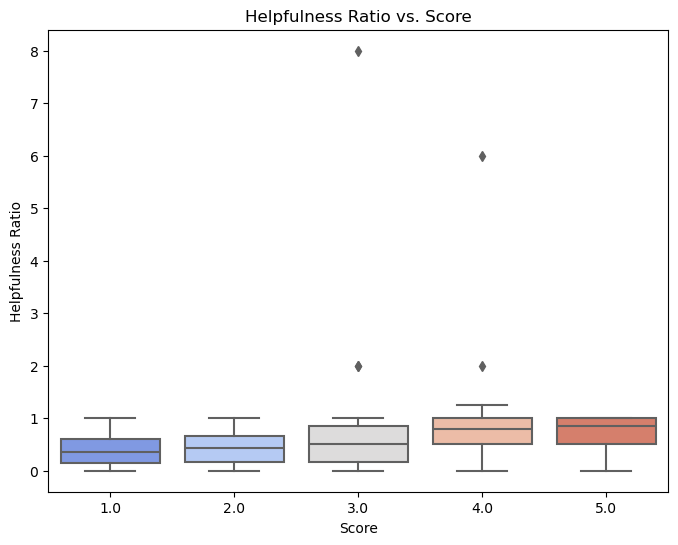

In [4]:
train_df['HelpfulnessRatio'] = np.where(train_df['HelpfulnessDenominator'] > 0,
                                        train_df['HelpfulnessNumerator'] / train_df['HelpfulnessDenominator'],
                                        np.nan)

# Plot the relationship between HelpfulnessRatio and Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Score', y='HelpfulnessRatio', data=train_df, palette='coolwarm')
plt.title('Helpfulness Ratio vs. Score')
plt.xlabel('Score')
plt.ylabel('Helpfulness Ratio')
plt.show()

In [5]:
# Correlation between Score and helpfulness metrics
corr_numerator = train_df['HelpfulnessNumerator'].corr(train_df['Score'])
corr_denominator = train_df['HelpfulnessDenominator'].corr(train_df['Score'])
corr_ratio = train_df['HelpfulnessRatio'].corr(train_df['Score'])

print(f"Correlation between HelpfulnessNumerator and Score: {corr_numerator:.4f}")
print(f"Correlation between HelpfulnessDenominator and Score: {corr_denominator:.4f}")
print(f"Correlation between HelpfulnessRatio and Score: {corr_ratio:.4f}")


Correlation between HelpfulnessNumerator and Score: -0.0159
Correlation between HelpfulnessDenominator and Score: -0.1076
Correlation between HelpfulnessRatio and Score: 0.2977


In [3]:
# Missing values check
print("\n=== Missing Values Summary ===")
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_summary)



=== Missing Values Summary ===
                         Missing Values  Percentage
Id                                    0    0.000000
ProductId                             0    0.000000
UserId                                0    0.000000
HelpfulnessNumerator                  0    0.000000
HelpfulnessDenominator                0    0.000000
Time                                  0    0.000000
Summary                              28    0.001885
Text                                 54    0.003636
Score                                 0    0.000000
Summary_glove_tokens                  0    0.000000
Text_glove_tokens                     0    0.000000
Summary_glove_tokens_np               0    0.000000
Text_glove_tokens_np                  0    0.000000


/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


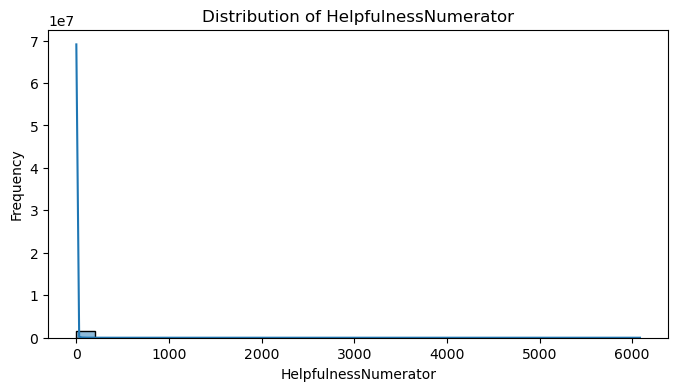

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


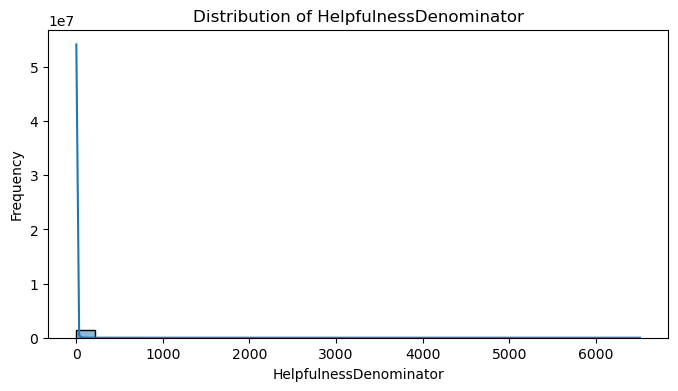

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


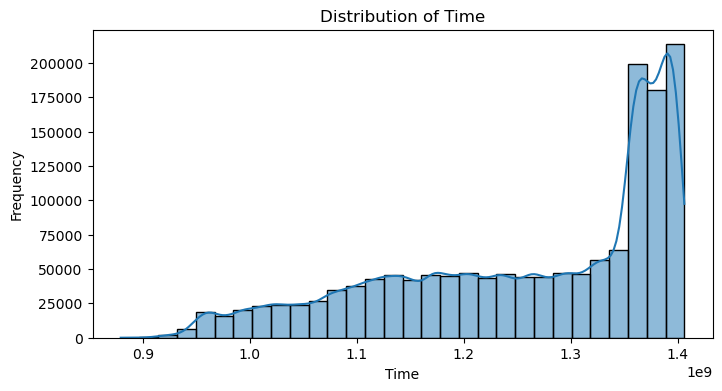

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


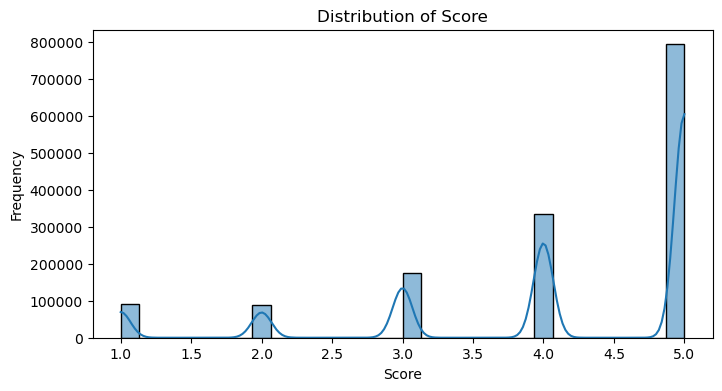

In [3]:
# Distribution of numerical features
numerical_cols = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Score']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



=== Correlation Matrix with Score ===
HelpfulnessNumerator     -0.015887
HelpfulnessDenominator   -0.107640
Time                      0.086102
Score                     1.000000
Name: Score, dtype: float64


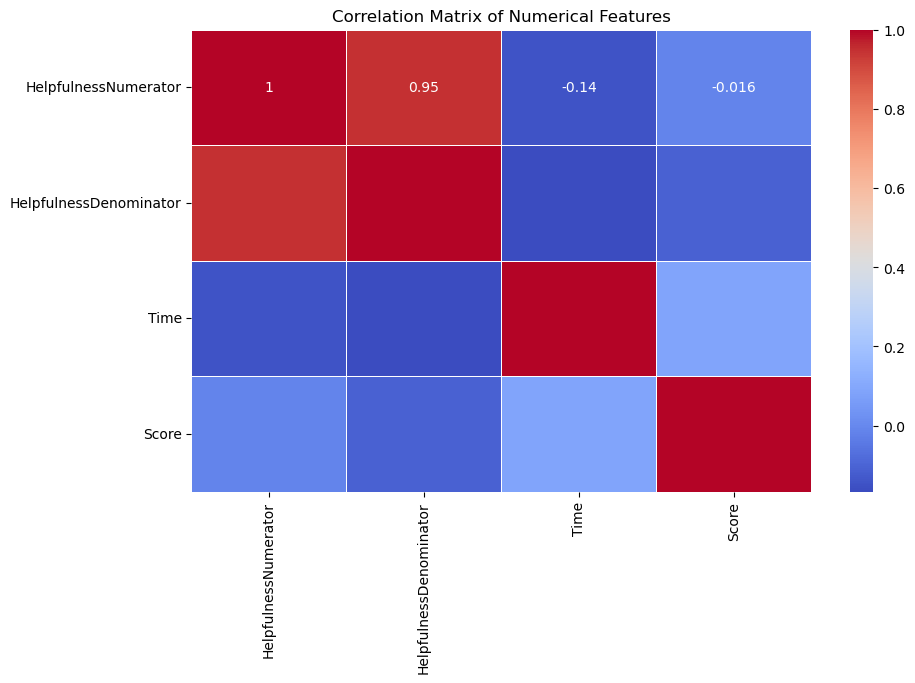

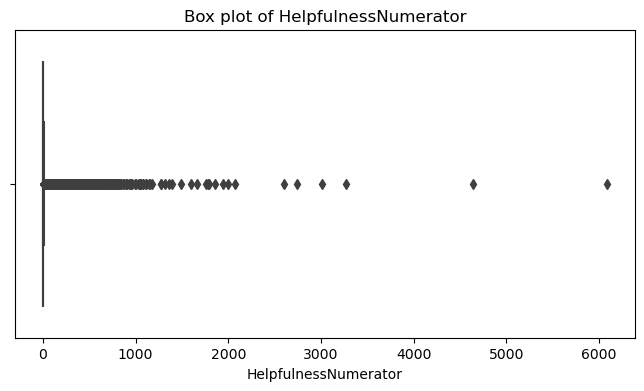

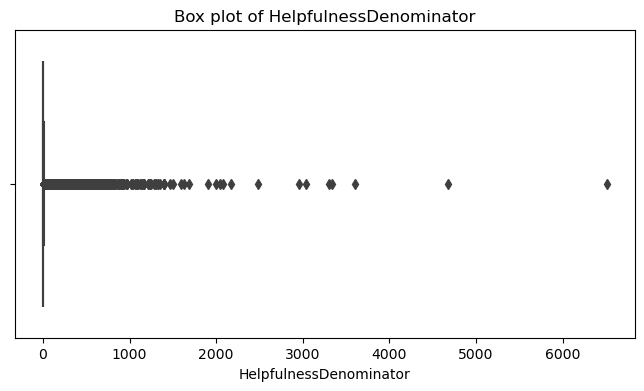

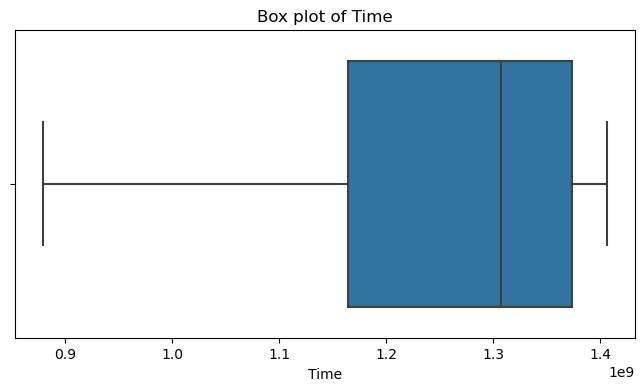

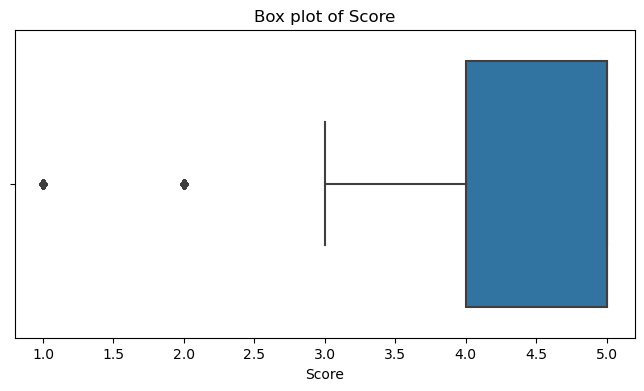

In [4]:
# Correlation between numerical features and Score
correlations = train_df[numerical_cols].corr()
print("\n=== Correlation Matrix with Score ===")
print(correlations['Score'])

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()
# Box plots to detect outliers in numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f"Box plot of {col}")
    plt.show()


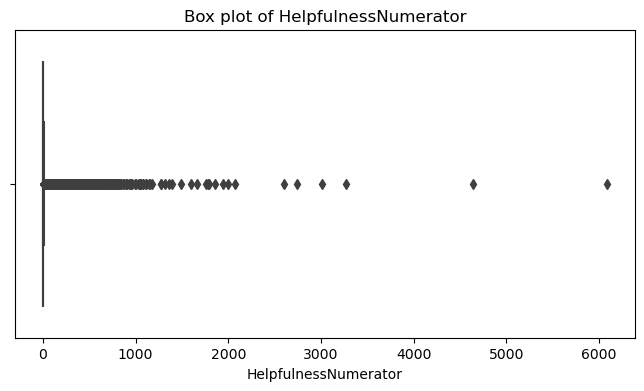

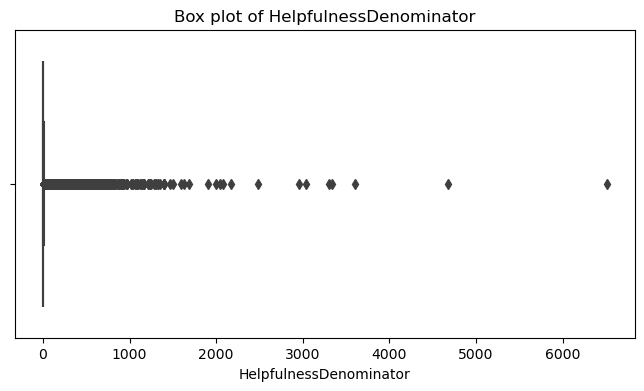

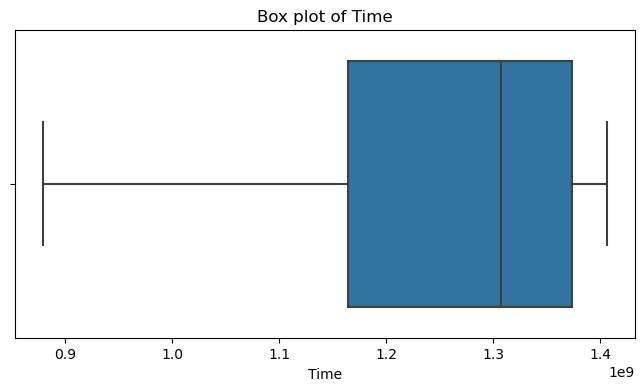

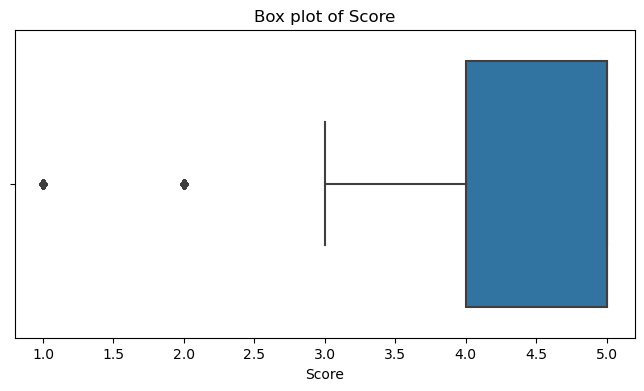

In [5]:
# Box plots to detect outliers in numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f"Box plot of {col}")
    plt.show()



=== Unique Values in ProductId and UserId ===
Number of unique ProductId: 50052
Number of unique UserId: 123957


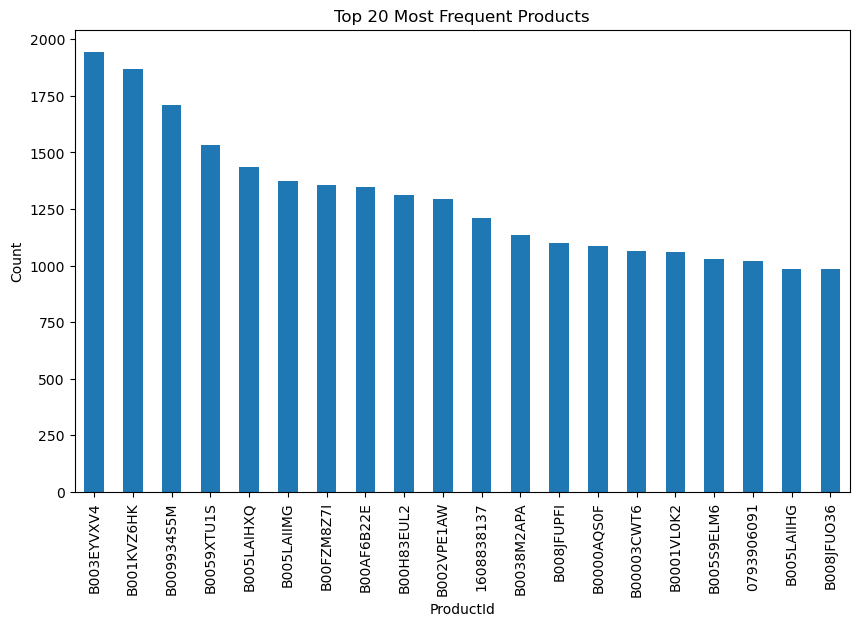

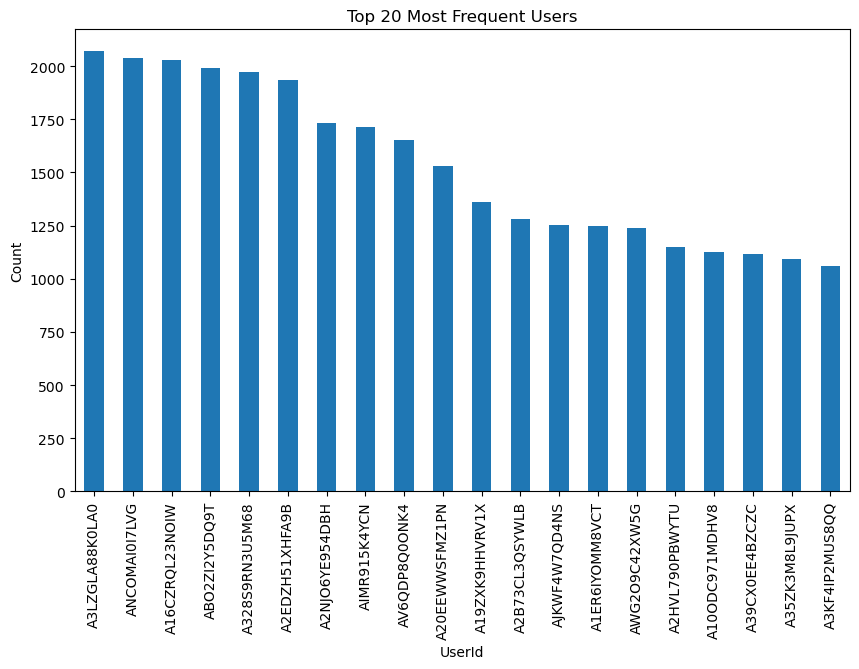

In [6]:
# Unique values of ProductId and UserId
print("\n=== Unique Values in ProductId and UserId ===")
print(f"Number of unique ProductId: {train_df['ProductId'].nunique()}")
print(f"Number of unique UserId: {train_df['UserId'].nunique()}")

# Distribution of ProductId and UserId
plt.figure(figsize=(10, 6))
train_df['ProductId'].value_counts().head(20).plot(kind='bar', title="Top 20 Most Frequent Products")
plt.xlabel("ProductId")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
train_df['UserId'].value_counts().head(20).plot(kind='bar', title="Top 20 Most Frequent Users")
plt.xlabel("UserId")
plt.ylabel("Count")
plt.show()


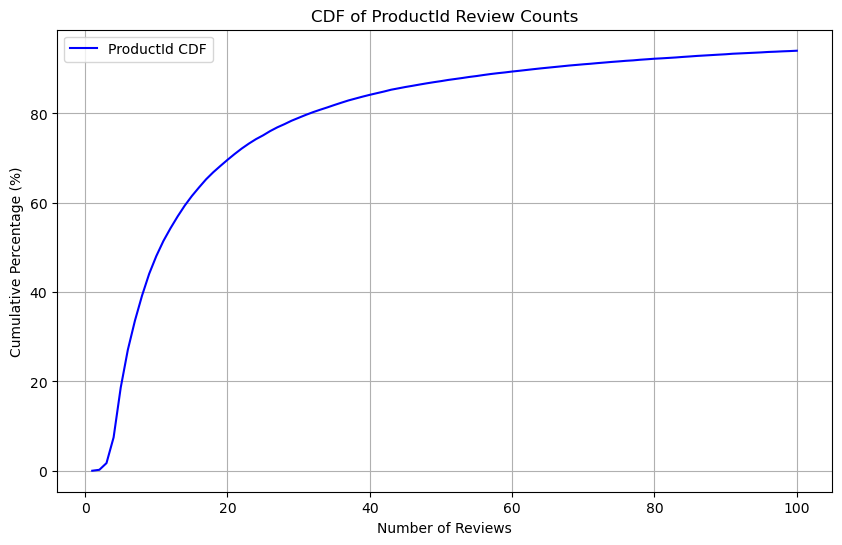

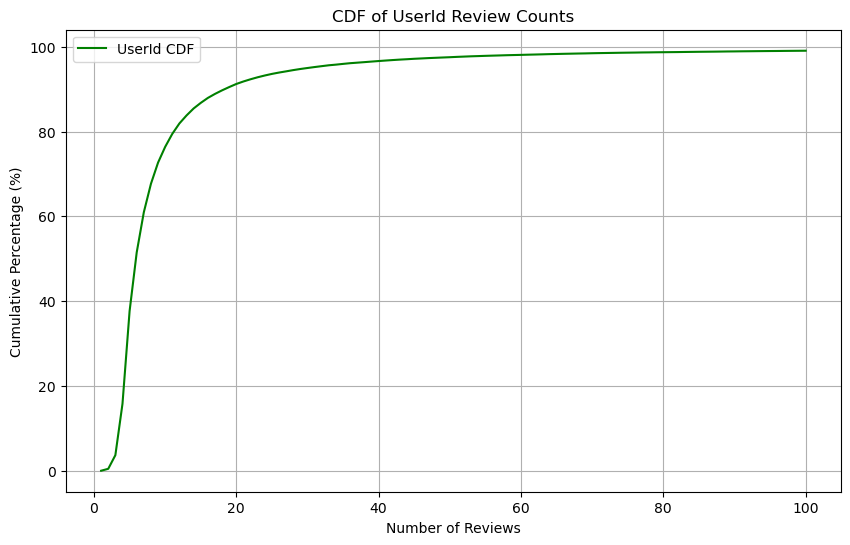

In [11]:
# Define the range of review counts to analyze (1 to 100 reviews)
review_thresholds = np.arange(1, 101)

# Calculate the CDF for ProductId
product_cdf = [(train_product_counts <= threshold).mean() * 100 for threshold in review_thresholds]

# Calculate the CDF for UserId
user_cdf = [(train_user_counts <= threshold).mean() * 100 for threshold in review_thresholds]

# Plot the CDF for ProductId
plt.figure(figsize=(10, 6))
plt.plot(review_thresholds, product_cdf, label='ProductId CDF', color='blue')
plt.title('CDF of ProductId Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Cumulative Percentage (%)')
plt.grid(True)
plt.legend()
plt.show()

# Plot the CDF for UserId
plt.figure(figsize=(10, 6))
plt.plot(review_thresholds, user_cdf, label='UserId CDF', color='green')
plt.title('CDF of UserId Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Cumulative Percentage (%)')
plt.grid(True)
plt.legend()
plt.show()


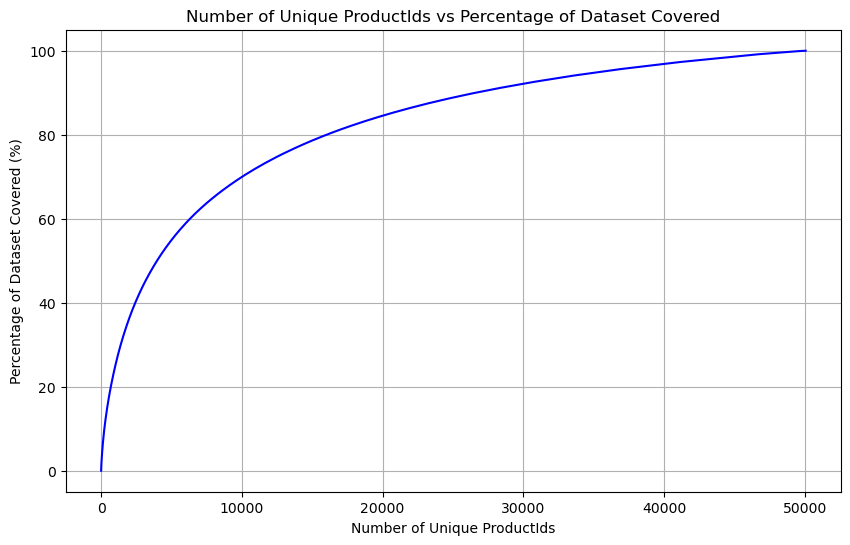

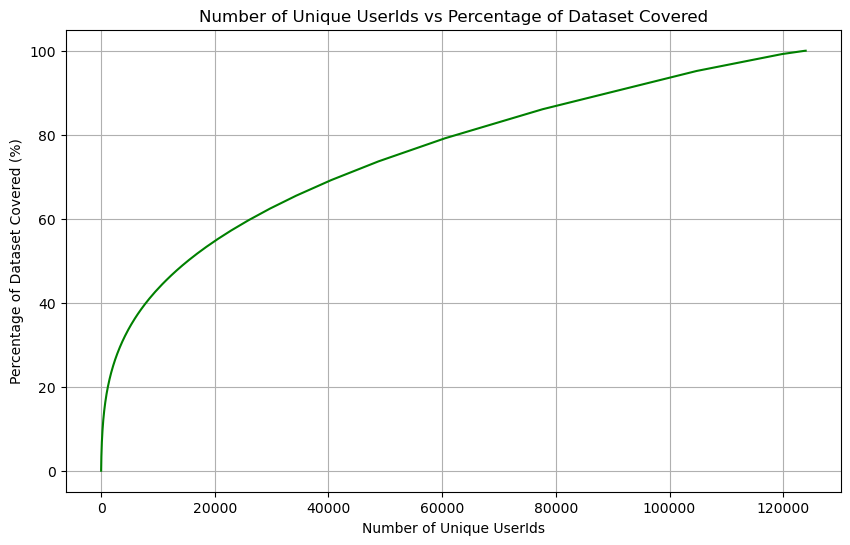

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_coverage(entity_counts, entity_name):
    """
    Plots the percentage of the dataset covered by the top n unique entities (users or products).
    
    Parameters:
    - entity_counts: A Series with the number of reviews per entity (UserId or ProductId).
    - entity_name: A string indicating whether it's 'UserId' or 'ProductId'.
    """
    # Sort the counts in descending order (from most to least reviews)
    sorted_entity_counts = entity_counts.sort_values(ascending=False)

    # Calculate cumulative reviews covered by top n entities
    cumulative_reviews_covered = sorted_entity_counts.cumsum()

    # Calculate percentage of dataset covered by top n entities
    percentage_covered = (cumulative_reviews_covered / len(train_df)) * 100

    # Generate x-axis for number of unique entities
    num_unique_entities = np.arange(1, len(sorted_entity_counts) + 1)

    # Plot the graph: number of unique entities vs % of dataset covered
    plt.figure(figsize=(10, 6))
    plt.plot(num_unique_entities, percentage_covered, color='green' if entity_name == 'UserId' else 'blue')
    plt.title(f'Number of Unique {entity_name}s vs Percentage of Dataset Covered')
    plt.xlabel(f'Number of Unique {entity_name}s')
    plt.ylabel('Percentage of Dataset Covered (%)')
    plt.grid(True)
    plt.show()

# Calculate review counts for ProductId and UserId
train_product_counts = train_df['ProductId'].value_counts()
train_user_counts = train_df['UserId'].value_counts()

# Plot coverage for ProductId
plot_coverage(train_product_counts, 'ProductId')

# Plot coverage for UserId
plot_coverage(train_user_counts, 'UserId')
# Add columns to train_df for the number of reviews per ProductId and UserId
train_df['Product_review_count'] = train_df.groupby('ProductId')['ProductId'].transform('count')
train_df['User_review_count'] = train_df.groupby('UserId')['UserId'].transform('count')

# Scatter plot: Product review count vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Product_review_count', y='Score', data=train_df, alpha=0.3, color="blue")
plt.title('Relationship Between Product Review Count and Score')
plt.xlabel('Number of Reviews (Product)')
plt.ylabel('Score')
plt.show()

# Scatter plot: User review count vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='User_review_count', y='Score', data=train_df, alpha=0.3, color="green")
plt.title('Relationship Between User Review Count and Score')
plt.xlabel('Number of Reviews (User)')
plt.ylabel('Score')
plt.show()


Correlation between Product_avg_score and individual Score: 0.46
Correlation between User_avg_score and individual Score: 0.55


/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

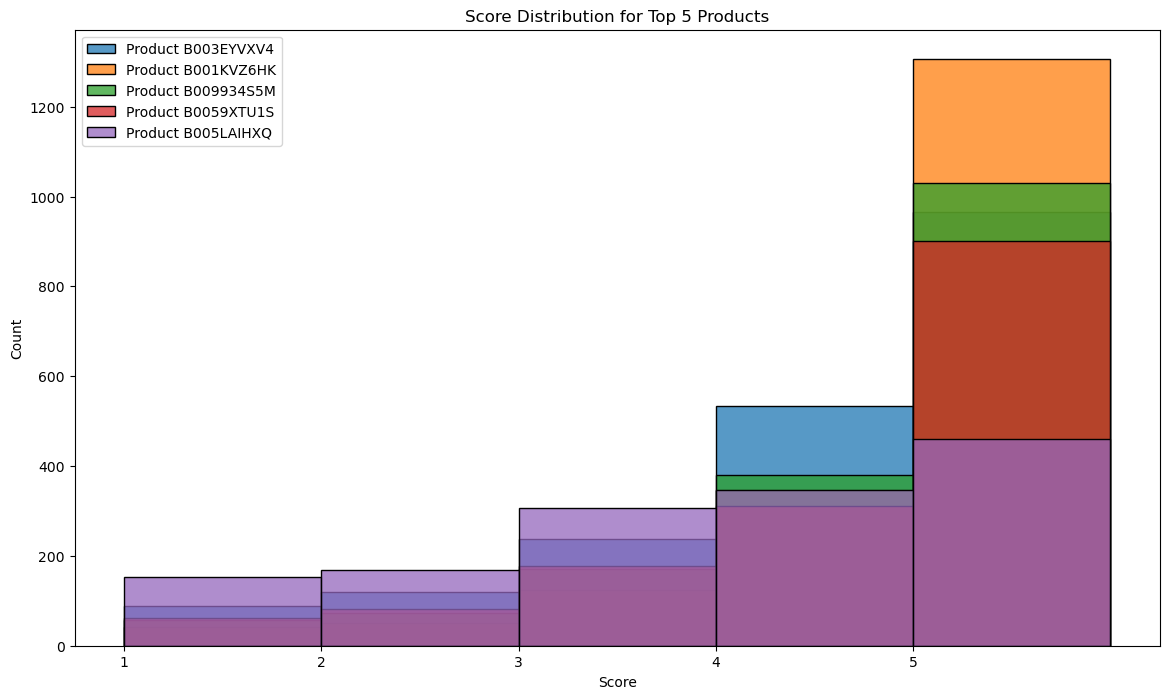

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

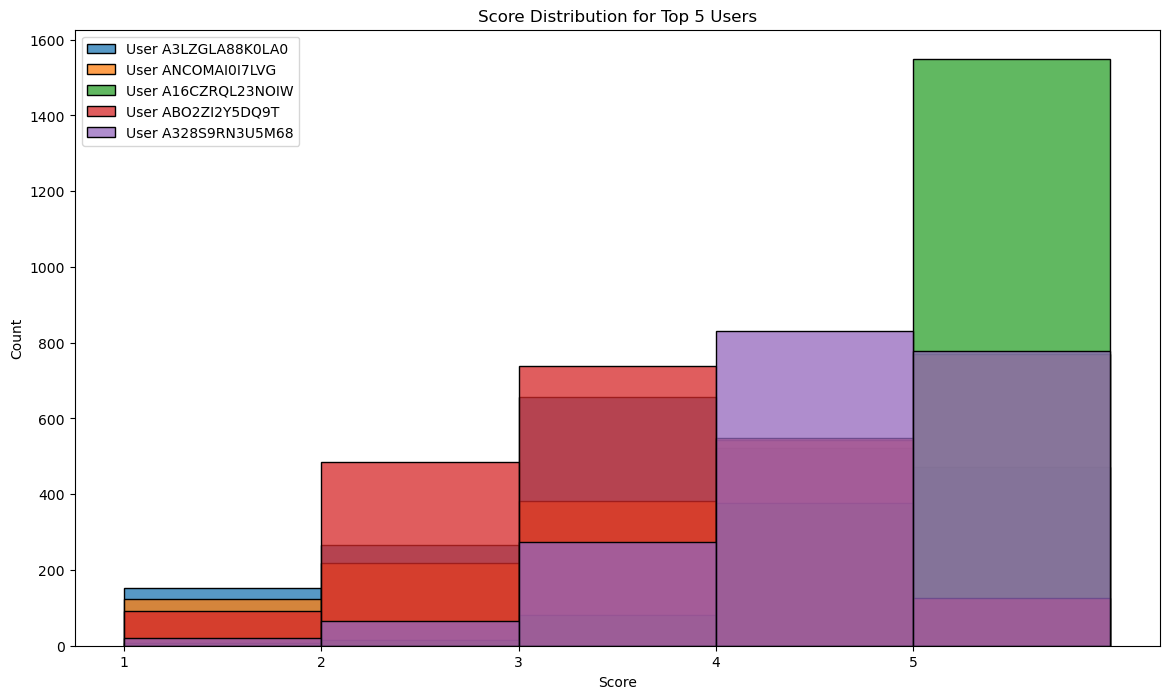

In [22]:
# Compute average score per ProductId and UserId in the train set
train_df['Product_avg_score'] = train_df.groupby('ProductId')['Score'].transform('mean')
train_df['User_avg_score'] = train_df.groupby('UserId')['Score'].transform('mean')
# Compute correlation between Product_avg_score and individual scores
product_correlation = train_df[['Product_avg_score', 'Score']].corr().iloc[0, 1]

# Compute correlation between User_avg_score and individual scores
user_correlation = train_df[['User_avg_score', 'Score']].corr().iloc[0, 1]

print(f"Correlation between Product_avg_score and individual Score: {product_correlation:.2f}")
print(f"Correlation between User_avg_score and individual Score: {user_correlation:.2f}")

# Plot the score distribution for top 5 products with the most reviews
top_5_products = train_df['ProductId'].value_counts().head(5).index

plt.figure(figsize=(14, 8))
for product_id in top_5_products:
    sns.histplot(train_df[train_df['ProductId'] == product_id]['Score'], bins=np.arange(1, 7), kde=False, label=f'Product {product_id}')
plt.title('Score Distribution for Top 5 Products')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(np.arange(1, 6))
plt.legend()
plt.show()

# Plot the score distribution for top 5 users with the most reviews
top_5_users = train_df['UserId'].value_counts().head(5).index

plt.figure(figsize=(14, 8))
for user_id in top_5_users:
    sns.histplot(train_df[train_df['UserId'] == user_id]['Score'], bins=np.arange(1, 7), kde=False, label=f'User {user_id}')
plt.title('Score Distribution for Top 5 Users')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(np.arange(1, 6))
plt.legend()
plt.show()


In [24]:
# User Representation
user_representation = train_df.groupby('UserId').agg(
    avg_user_score=('Score', 'mean'),
    user_review_count=('Score', 'size'),
    frac_score_1=('Score', lambda x: (x == 1).mean()),
    frac_score_2=('Score', lambda x: (x == 2).mean()),
    frac_score_3=('Score', lambda x: (x == 3).mean()),
    frac_score_4=('Score', lambda x: (x == 4).mean()),
    frac_score_5=('Score', lambda x: (x == 5).mean())
).reset_index()

# Product Representation
product_representation = train_df.groupby('ProductId').agg(
    avg_product_score=('Score', 'mean'),
    product_review_count=('Score', 'size'),
    frac_score_1=('Score', lambda x: (x == 1).mean()),
    frac_score_2=('Score', lambda x: (x == 2).mean()),
    frac_score_3=('Score', lambda x: (x == 3).mean()),
    frac_score_4=('Score', lambda x: (x == 4).mean()),
    frac_score_5=('Score', lambda x: (x == 5).mean())
).reset_index()

# Display user and product representations
user_representation.head(), product_representation.head()


(                  UserId  avg_user_score  user_review_count  frac_score_1  \
 0  A00295401U6S2UG3RAQSZ             4.0                  5           0.0   
 1   A00348066Q1WEW5BMESN             5.0                  5           0.0   
 2   A0040548BPHKXMHH3NTI             3.6                 10           0.1   
 3  A00438023NNXSDBGXK56L             3.2                  5           0.0   
 4   A0048168OBFNFN7WW8XC             5.0                  8           0.0   
 
    frac_score_2  frac_score_3  frac_score_4  frac_score_5  
 0           0.0           0.0           1.0           0.0  
 1           0.0           0.0           0.0           1.0  
 2           0.0           0.3           0.4           0.2  
 3           0.4           0.2           0.2           0.2  
 4           0.0           0.0           0.0           1.0  ,
     ProductId  avg_product_score  product_review_count  frac_score_1  \
 0  0005019281           4.473118                    93      0.000000   
 1  0005119367   

In [35]:
def visualize_representation(entity_representation, entity_type, entity_id=None):
    """
    Visualizes the representation of a specific user or product.
    
    Parameters:
    - entity_representation: DataFrame containing user or product representation.
    - entity_type: String, either 'User' or 'Product' to label the visualizations.
    - entity_id: Optional, specific UserId or ProductId to visualize. If None, randomly samples an entity.
    """
    if entity_id is None:
        # Randomly sample an entity if none is provided
        entity = entity_representation.sample(1)
    else:
        # Select the specific entity
        entity = entity_representation[entity_representation[entity_type + 'Id'] == entity_id]

    if entity.empty:
        print(f"No {entity_type} found with ID: {entity_id}")
        return

    entity = entity.iloc[0]  # Extract the first row

    # Plot average score and review count
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.barh([entity_type], [entity[f'avg_{entity_type.lower()}_score']], color='blue')
    plt.title(f'Average {entity_type} Score')
    plt.xlim(1, 5)
    
    plt.subplot(1, 2, 2)
    plt.barh([entity_type], [entity[f'{entity_type.lower()}_review_count']], color='green')
    plt.title(f'{entity_type} Review Count')
    
    plt.tight_layout()
    plt.show()
    
    # Plot fraction of scores (1 to 5)
    score_fractions = [
        entity[f'frac_score_1'],
        entity[f'frac_score_2'],
        entity[f'frac_score_3'],
        entity[f'frac_score_4'],
        entity[f'frac_score_5'],
    ]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=[1, 2, 3, 4, 5], y=score_fractions, palette='coolwarm')
    plt.title(f'{entity_type} Score Distribution (ID: {entity_id})')
    plt.xlabel('Score')
    plt.ylabel('Fraction of Reviews')
    plt.ylim(0, 1)
    plt.show()

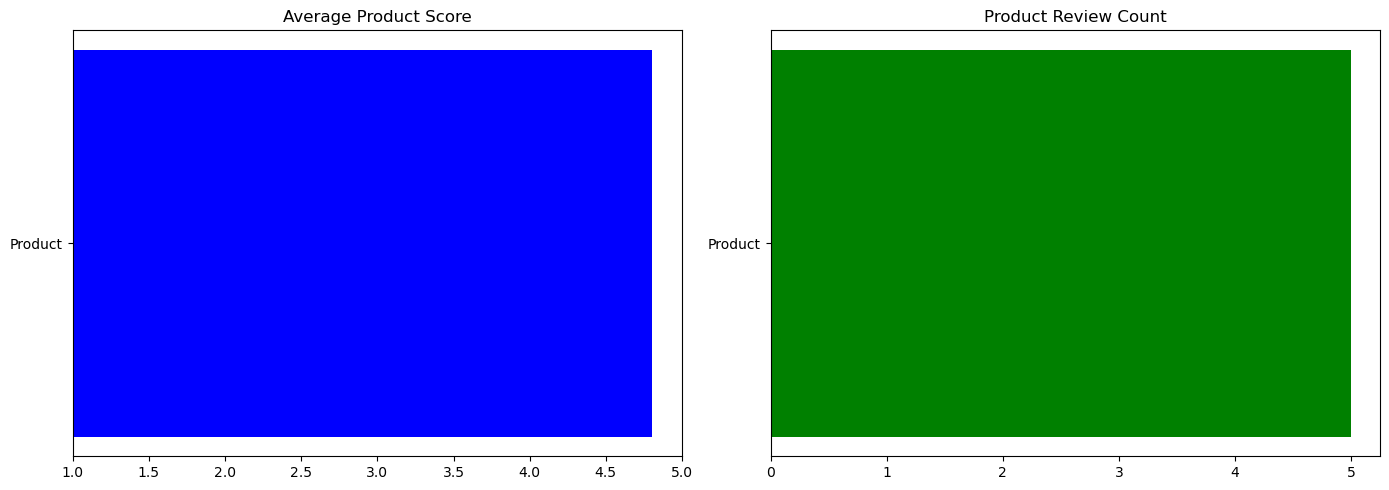

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


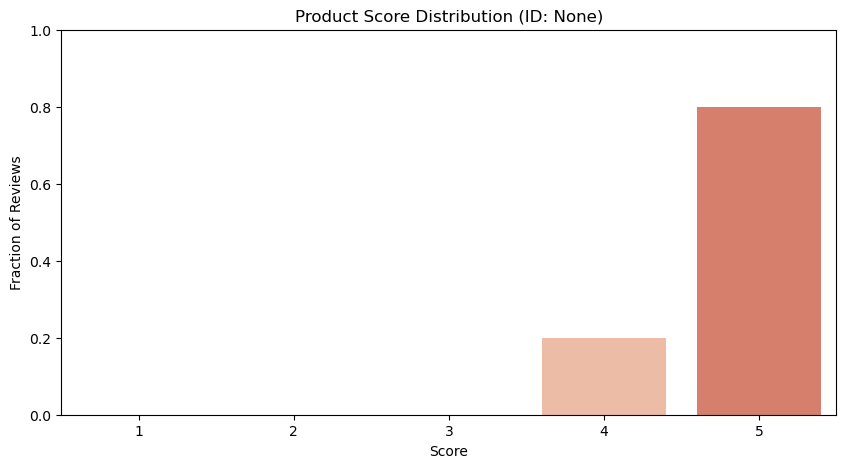

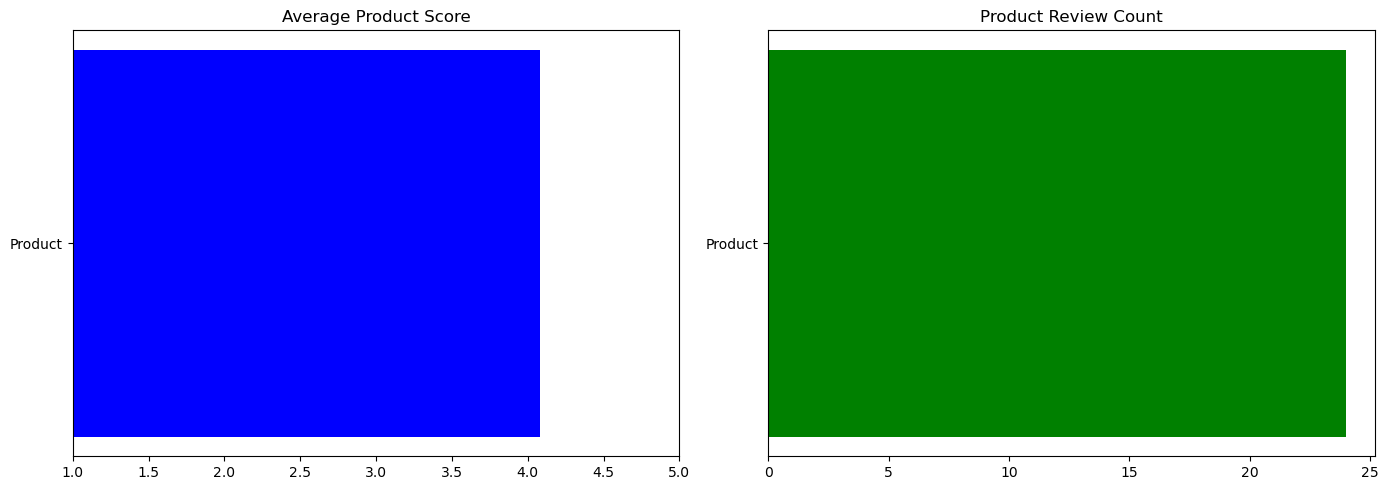

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


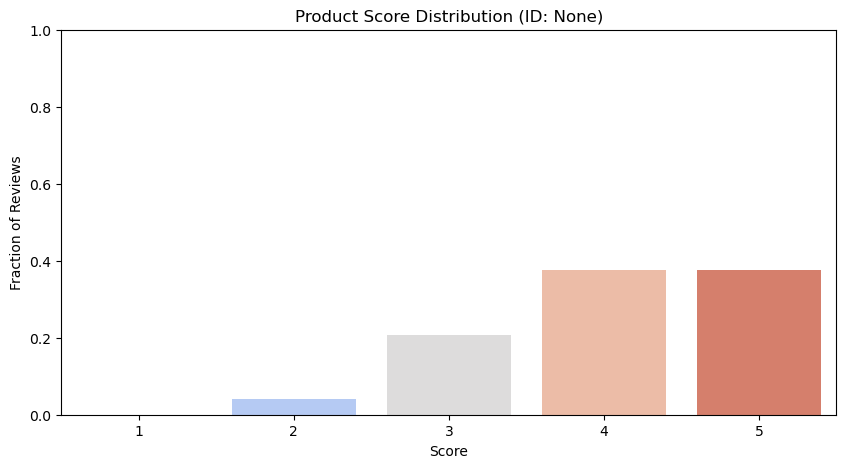

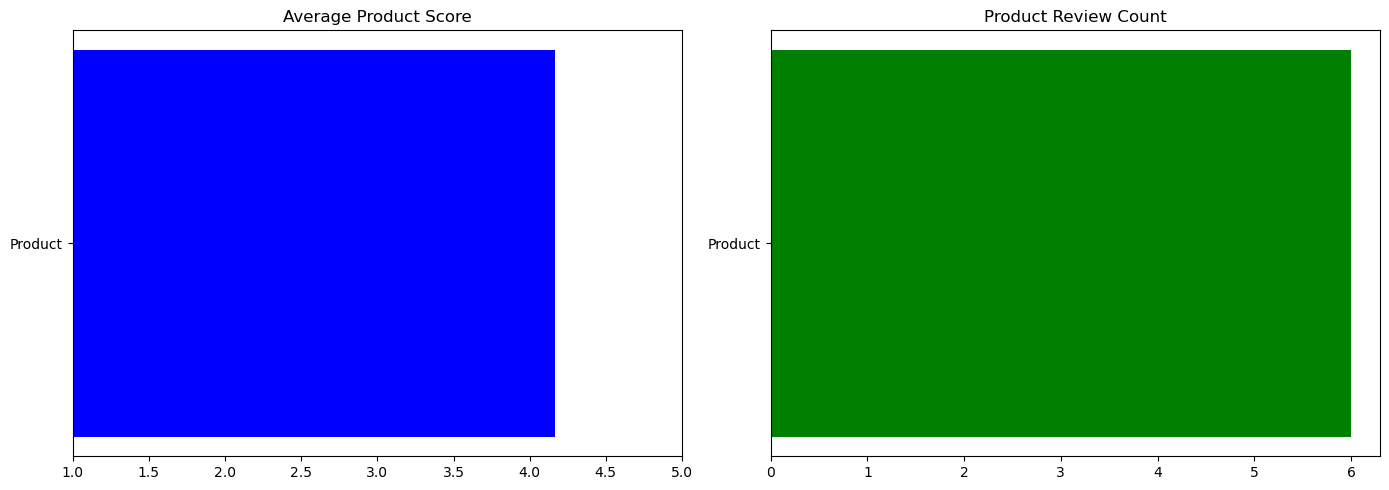

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


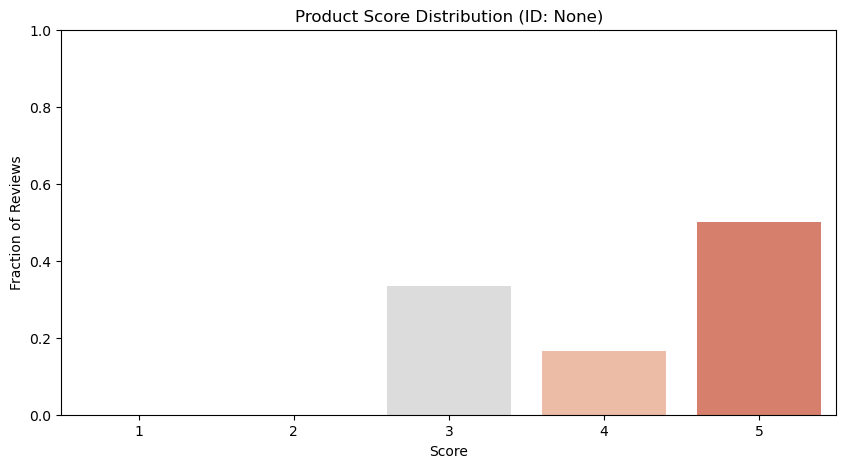

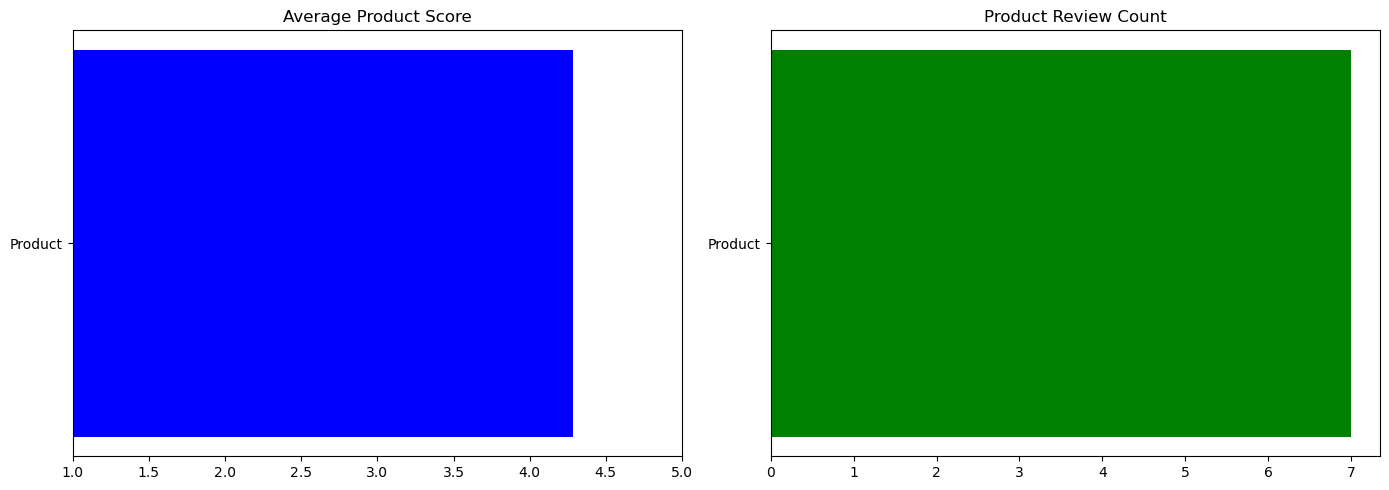

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


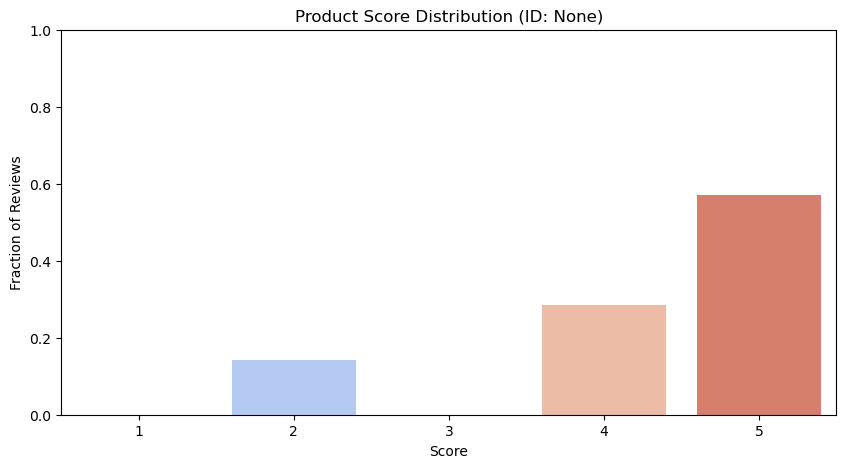

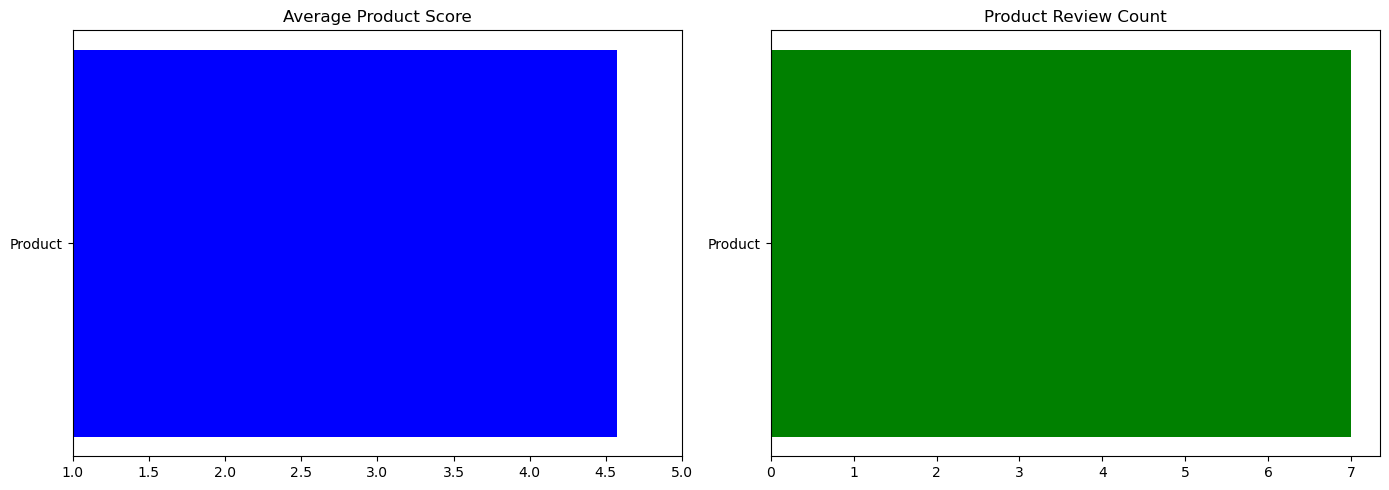

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


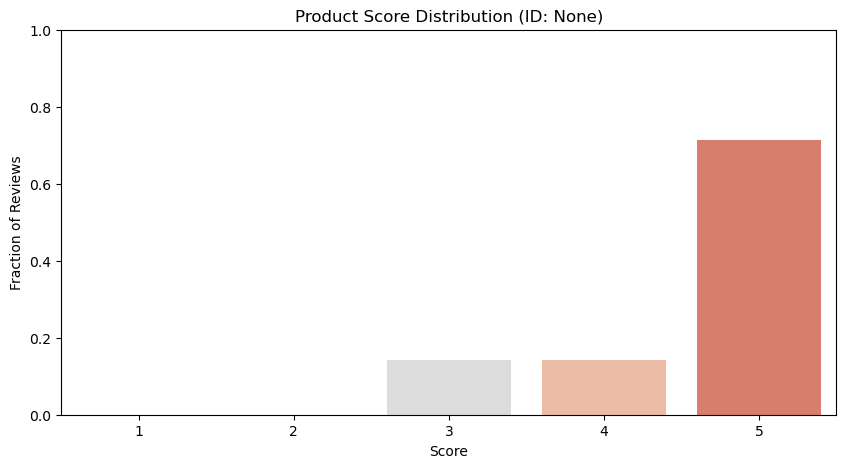

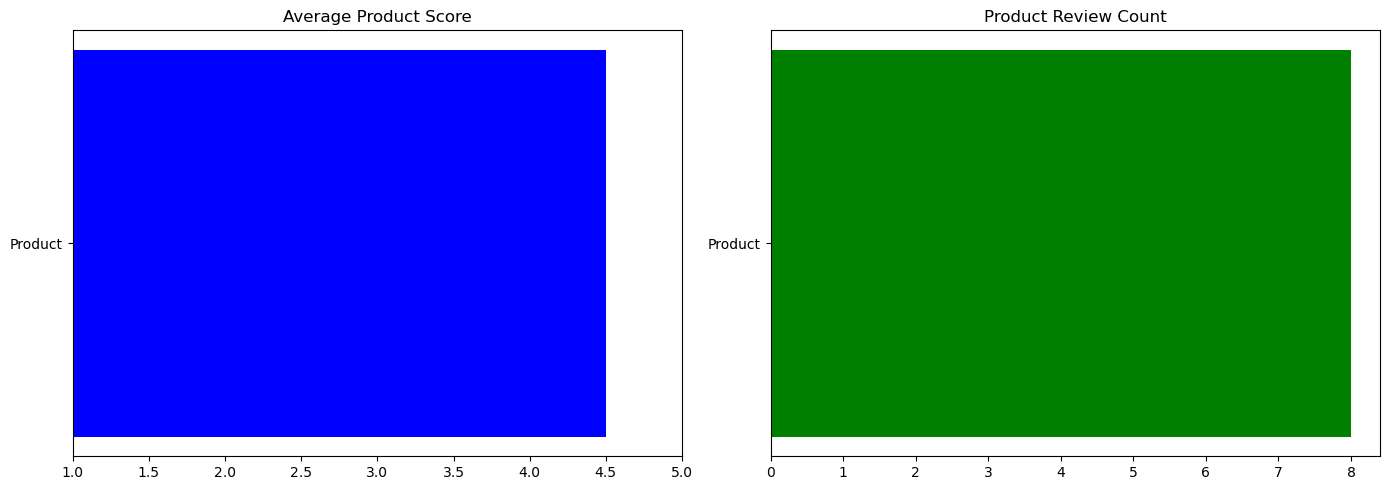

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


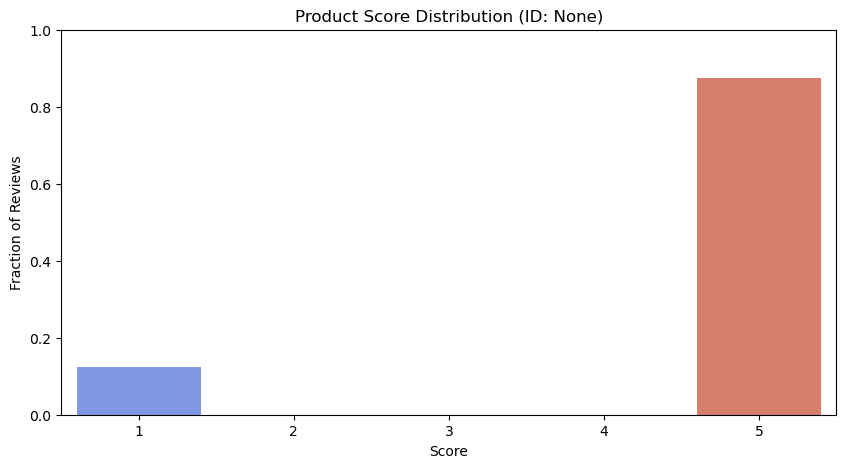

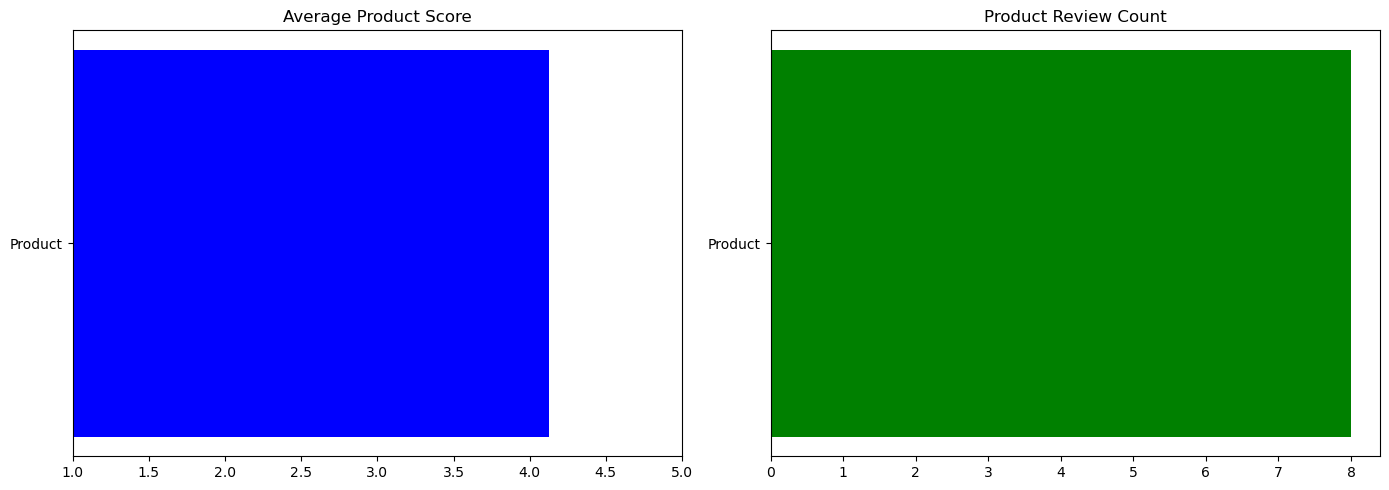

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


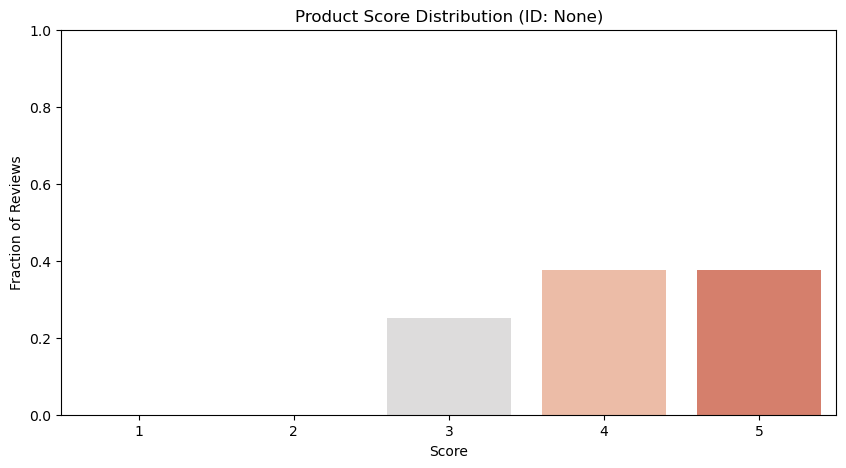

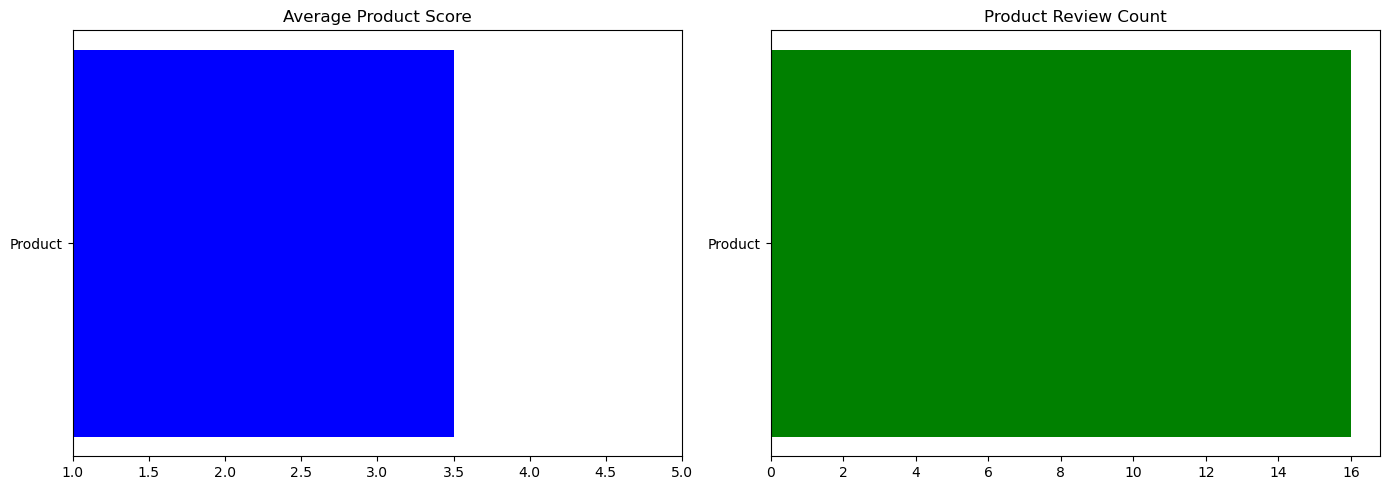

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


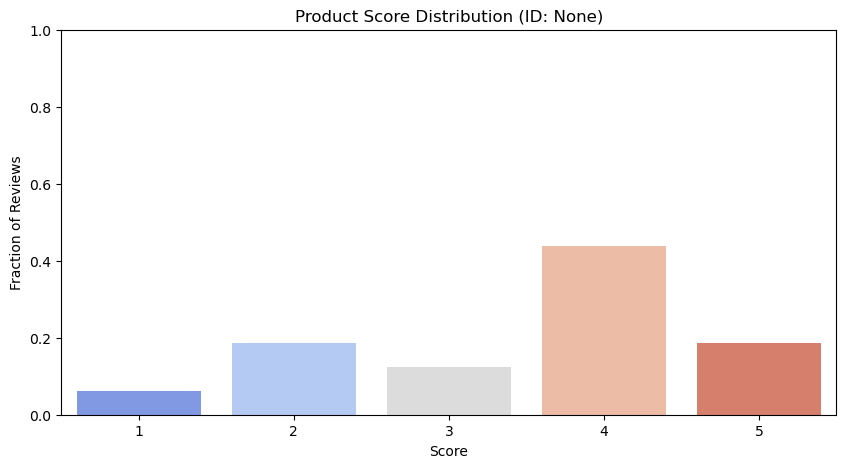

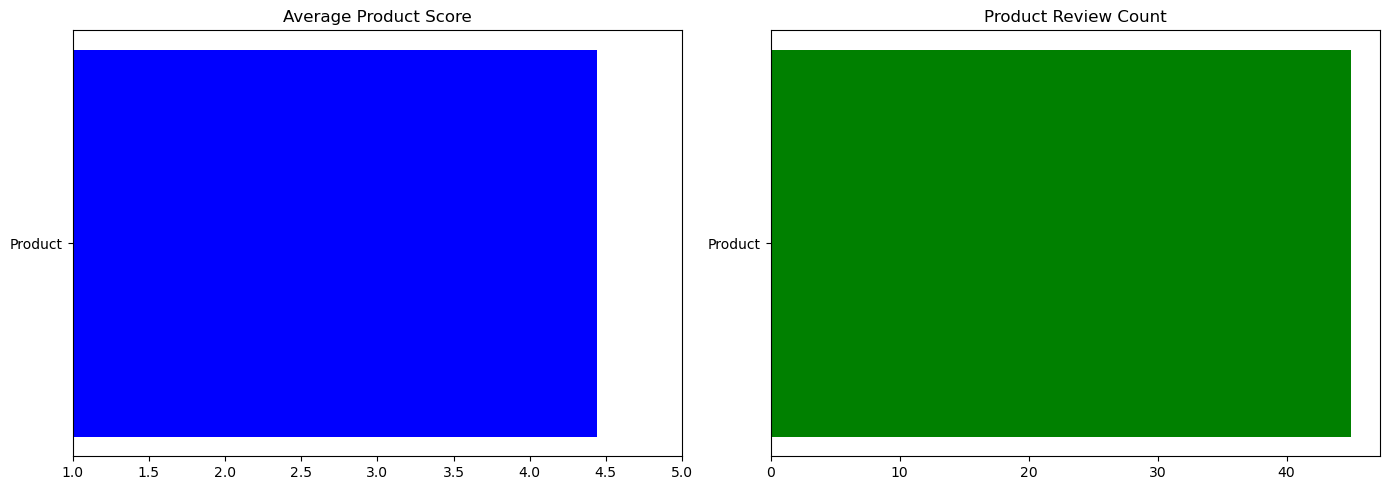

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


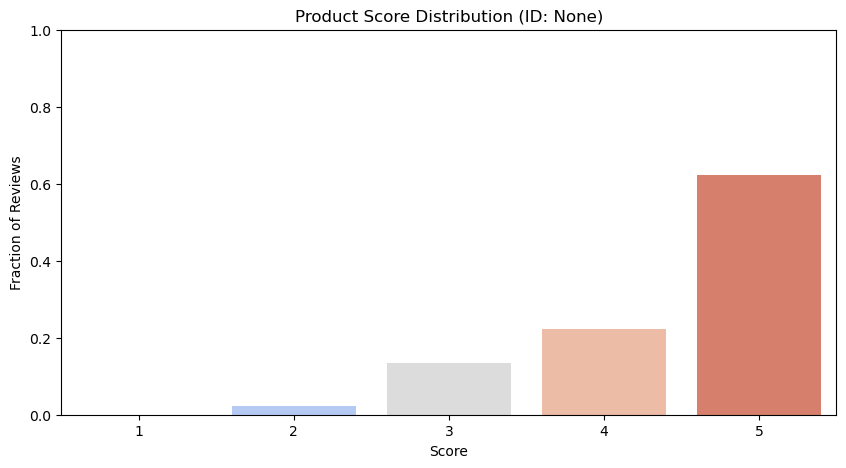

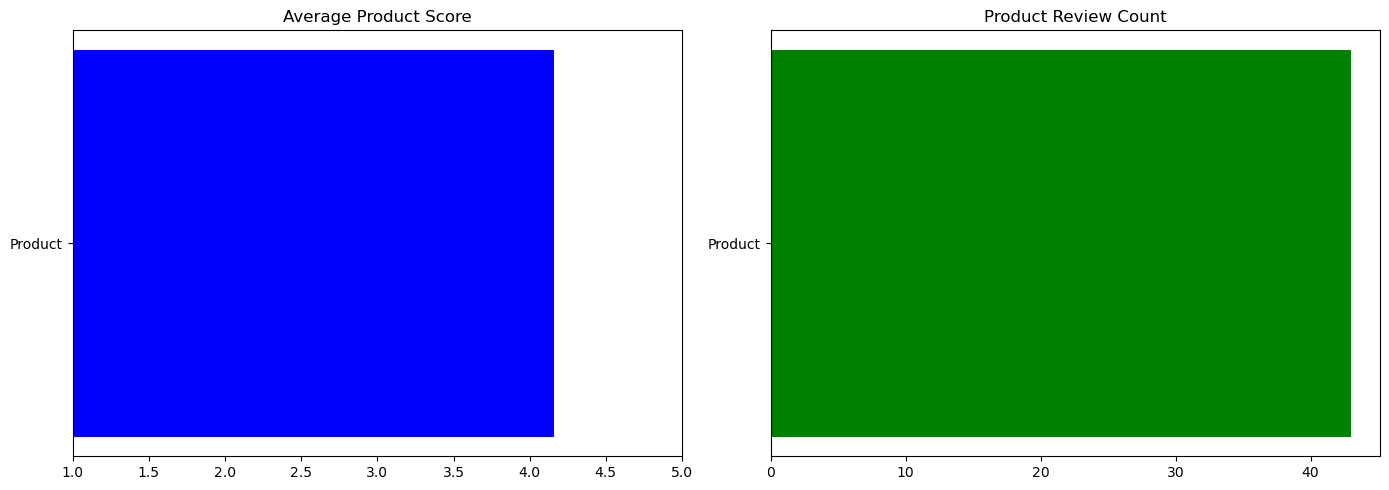

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


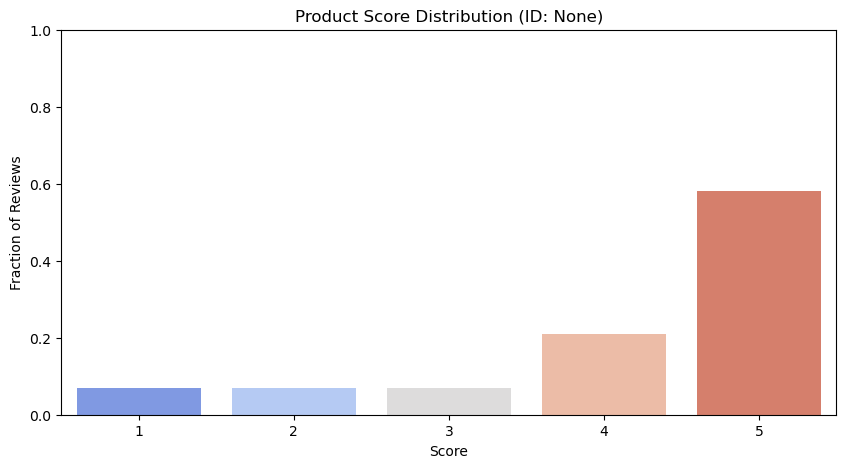

In [37]:
for _ in range(10):
    visualize_representation(product_representation, 'Product')